In [2]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from PIL import Image
import cv2
import keras
from keras.applications.vgg16 import preprocess_input,VGG16
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,Dropout,GlobalAveragePooling2D,Flatten,Input
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import classification_report
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Function to load images

def convert_image_to_dataset(file_location):
    label=0
    df=pd.DataFrame()
    for category in glob(file_location+'/*'):
        for file in tqdm(glob(category+'/*')):
            img_array=cv2.imread(file)
            img_array=cv2.resize(img_array,(224, 224))
            data=pd.DataFrame({'image':[img_array],'label':[label]})
            df=df.append(data)
        label+=1
    return df.sample(frac=1).reset_index(drop=True)

In [4]:
# Function to convert output labels to its class of tumor.


def inverse_classes(num):
    if num==0:
        return 'Glioma Tumor'
    elif num==1:
        return 'Meningioma Tumor'
    elif num==2:
        return 'No Tumor'
    else:
        return 'Pituitary Tumor'
    

In [5]:
train_data=convert_image_to_dataset('../input/brain-tumor-classification-mri/Training')
train_x=np.array(train_data.image.to_list())

100%|██████████| 826/826 [00:08<00:00, 100.90it/s]


In [6]:
test_data=convert_image_to_dataset('../input/brain-tumor-classification-mri/Testing')
test_x=np.array(test_data.image.to_list())

100%|██████████| 100/100 [00:01<00:00, 93.25it/s]


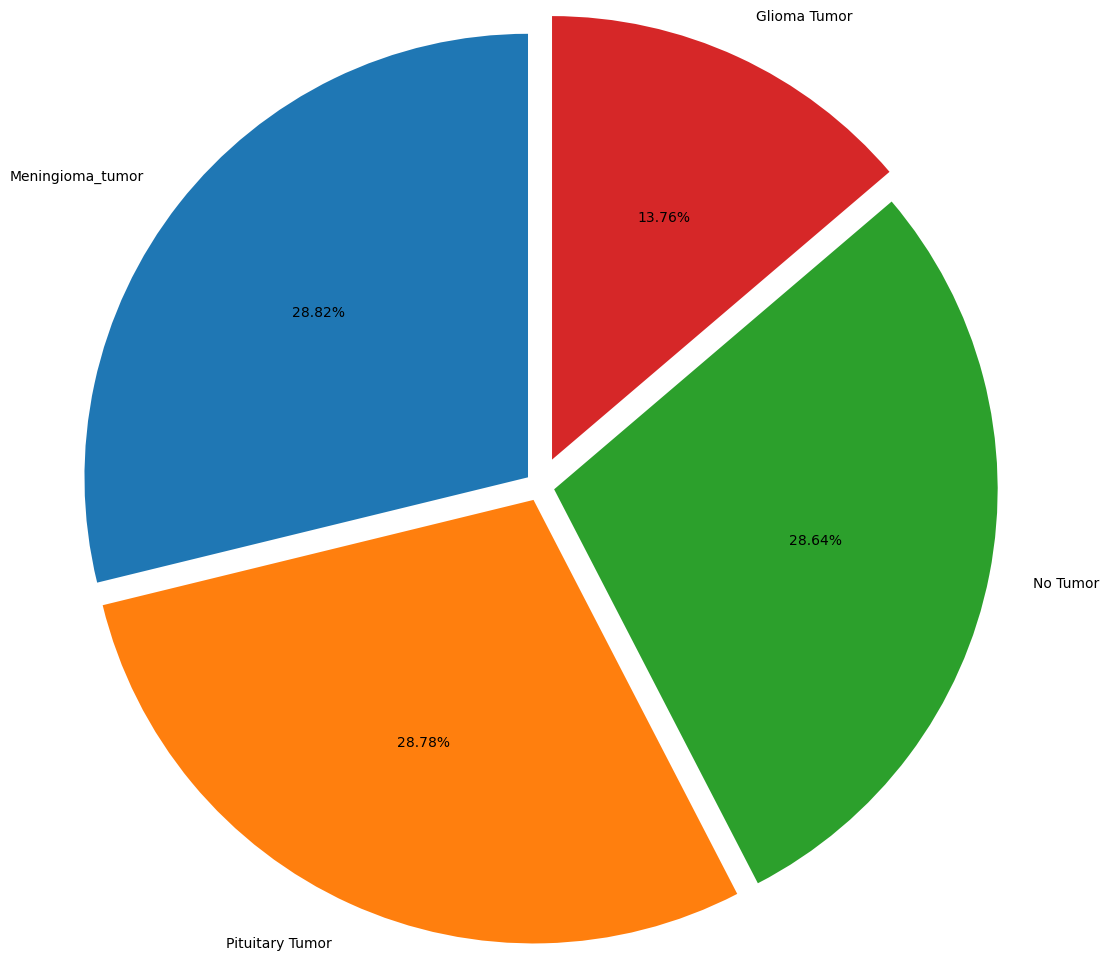

In [7]:
plt.pie(train_data.label.value_counts(),startangle=90,explode=[0.1,0.1,0.1,0.2],autopct='%0.2f%%',
        labels=['Meningioma_tumor', 'Pituitary Tumor', 'No Tumor', 'Glioma Tumor'],radius=3)
plt.show()

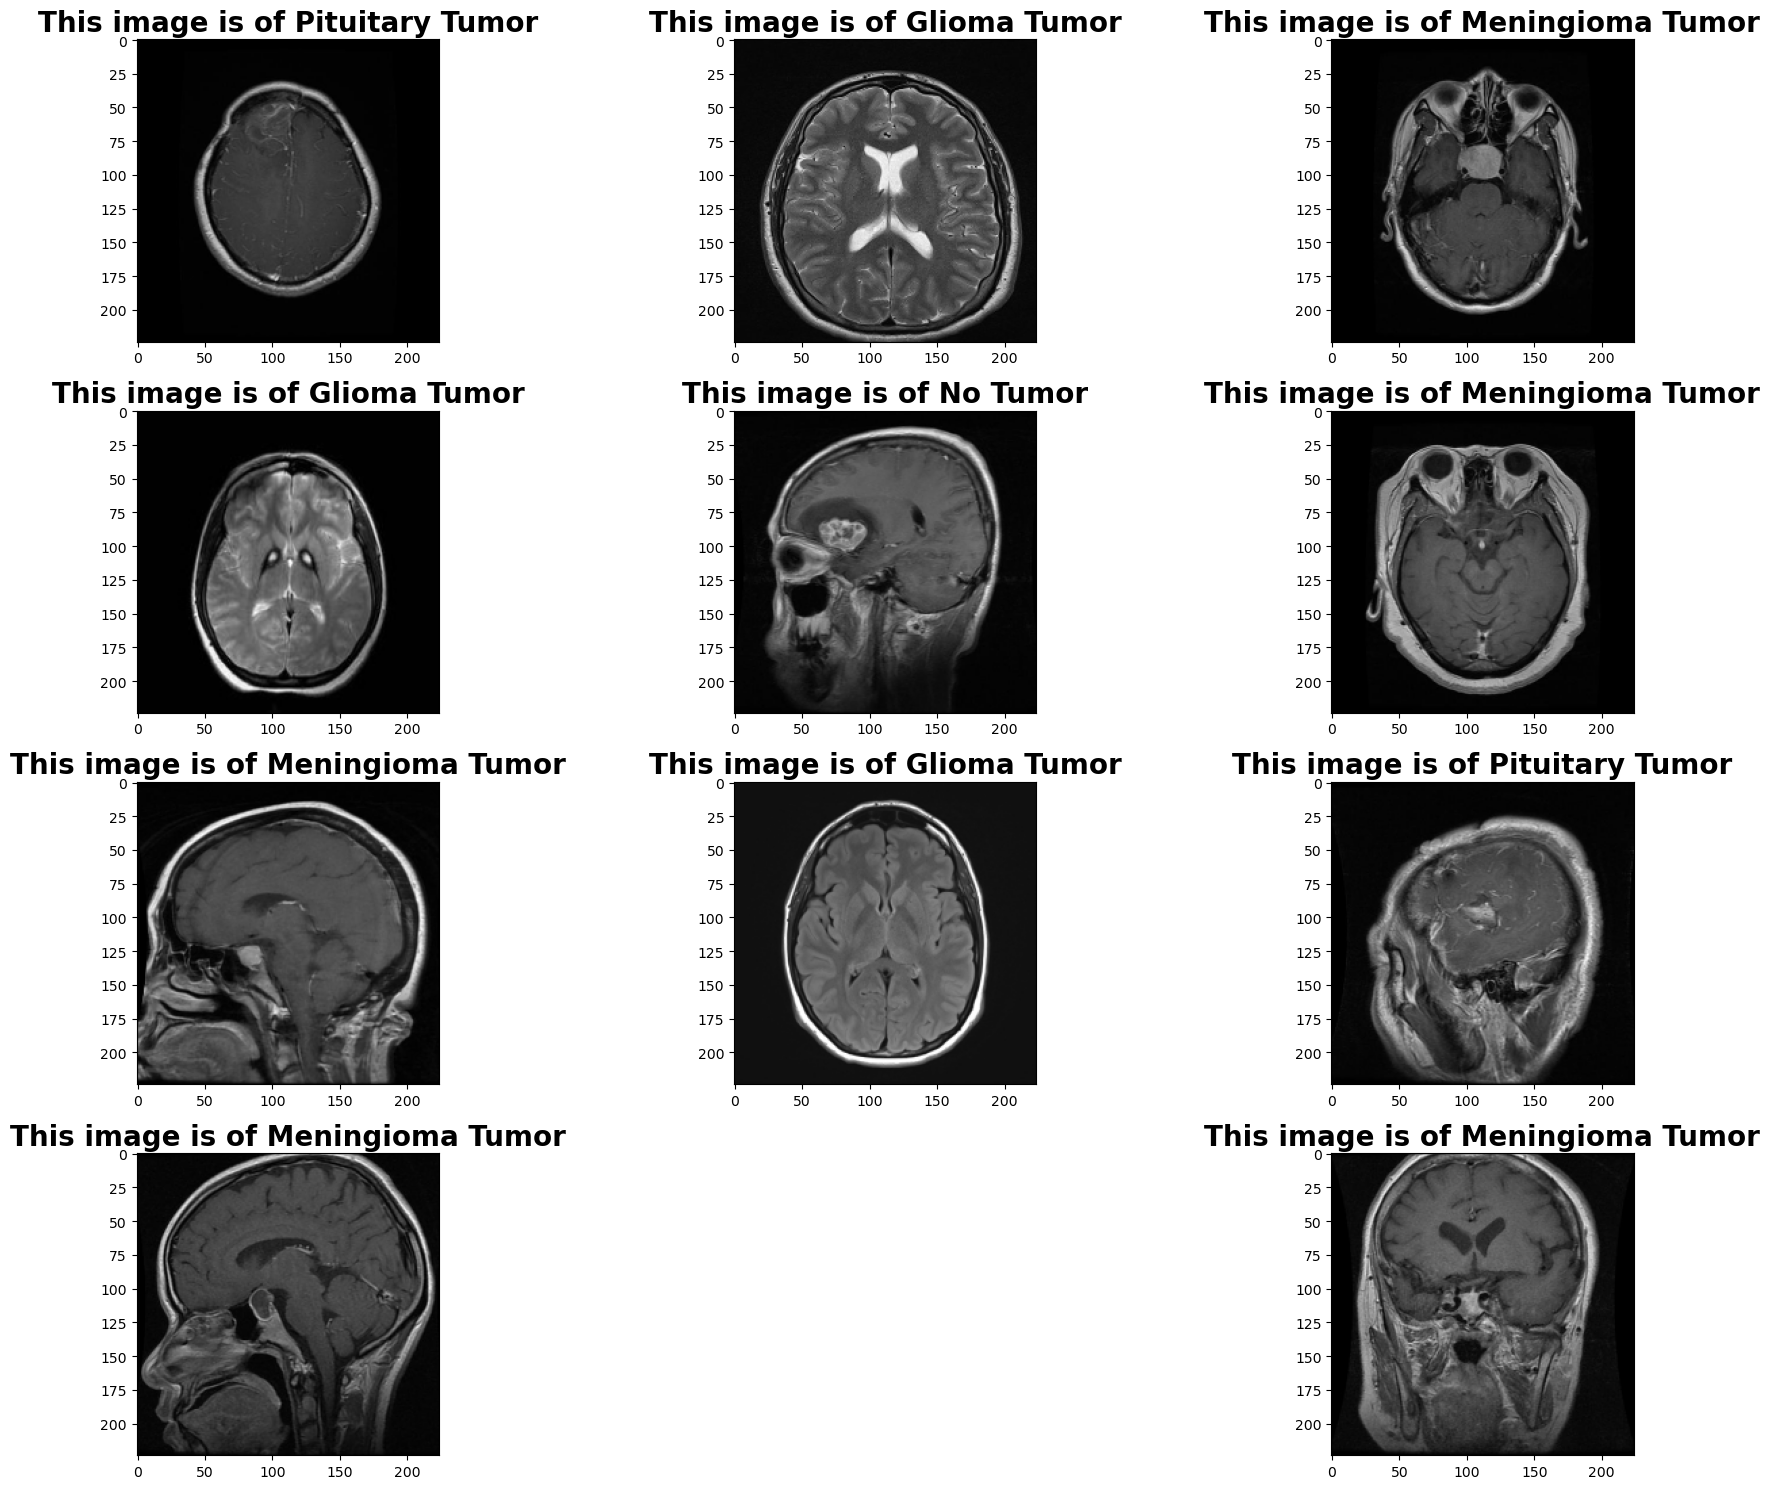

In [8]:
plt.figure(figsize=(20,15))
for i in range(12):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(2000)
    plt.title('This image is of {0}'.format(inverse_classes(train_data.label[index])),fontdict={'size':20,'weight':'bold'})
    plt.imshow(train_data.image[index])
    plt.tight_layout()

In [9]:
early_stop=EarlyStopping(patience=3)
reduceLR=ReduceLROnPlateau(patience=2)

In [10]:
vgg_model = VGG16(weights='imagenet', include_top=False)

for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.15)(x)
output = Dense(4, activation='softmax')(x)

model2 = Model(inputs=vgg_model.input, outputs=output)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 3s 0us/step


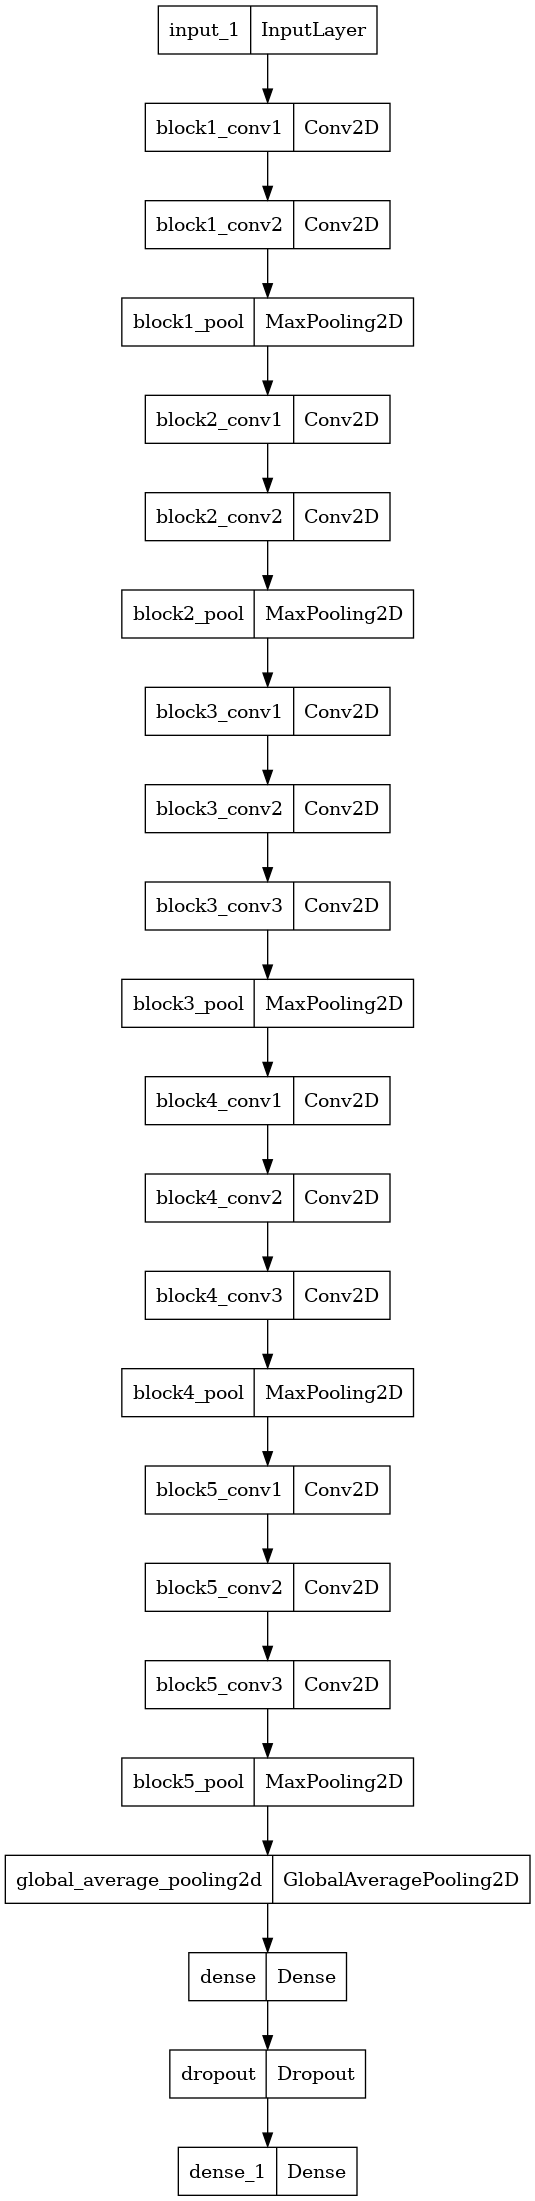

In [11]:
plot_model(model2)

In [12]:
r2=model2.fit(train_x,train_data.label,validation_split=0.1,epochs=13,callbacks=[early_stop,reduceLR])

Epoch 1/13
81/81 [==============================] - 719s 9s/step - loss: 1.1770 - accuracy: 0.6787 - val_loss: 0.5125 - val_accuracy: 0.7909 - lr: 0.0010
Epoch 2/13
81/81 [==============================] - 718s 9s/step - loss: 0.4504 - accuracy: 0.8304 - val_loss: 0.4148 - val_accuracy: 0.8258 - lr: 0.0010
Epoch 3/13
81/81 [==============================] - 722s 9s/step - loss: 0.3581 - accuracy: 0.8587 - val_loss: 0.3527 - val_accuracy: 0.8606 - lr: 0.0010
Epoch 4/13
81/81 [==============================] - 723s 9s/step - loss: 0.2913 - accuracy: 0.8893 - val_loss: 0.3378 - val_accuracy: 0.8676 - lr: 0.0010
Epoch 5/13
81/81 [==============================] - 721s 9s/step - loss: 0.2251 - accuracy: 0.9199 - val_loss: 0.2981 - val_accuracy: 0.8746 - lr: 0.0010
Epoch 6/13
81/81 [==============================] - 729s 9s/step - loss: 0.1819 - accuracy: 0.9307 - val_loss: 0.2652 - val_accuracy: 0.8990 - lr: 0.0010
Epoch 7/13
81/81 [==============================] - 718s 9s/step - loss: 0.1

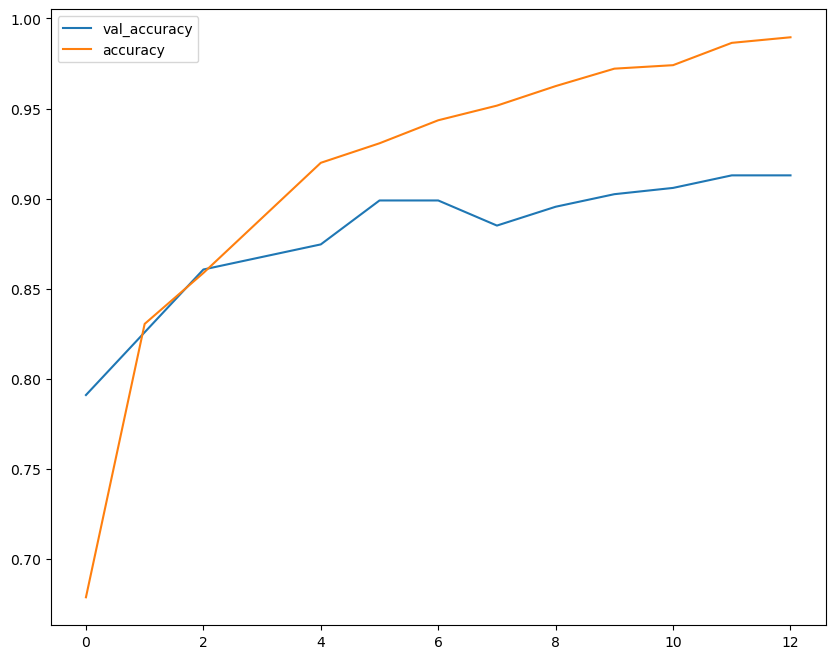

In [13]:
plt.figure(figsize=(10,8))
plt.plot(r2.history['val_accuracy'])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
plt.plot(r2.history['accuracy'])
plt.legend(['val_accuracy','accuracy'])
plt.show()

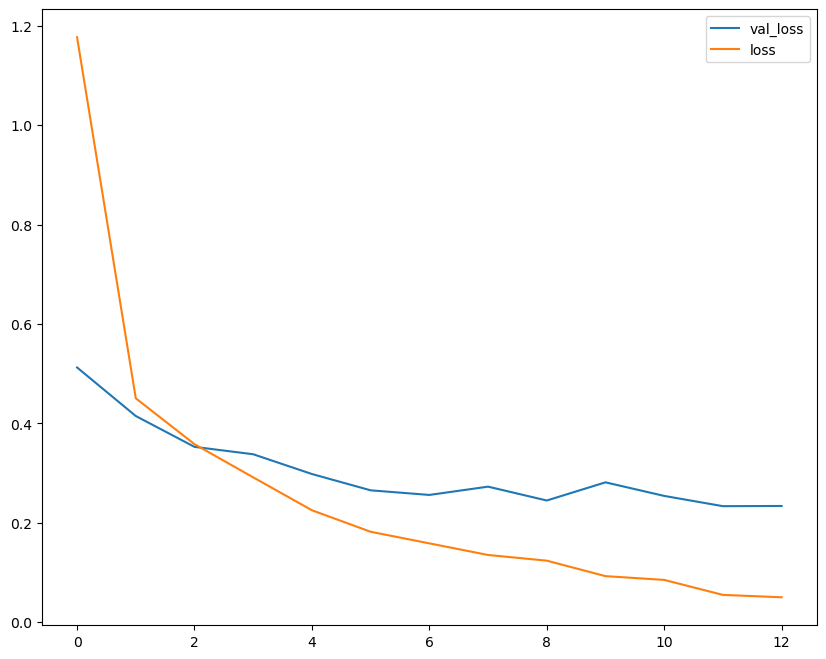

In [14]:
plt.figure(figsize=(10,8))
plt.plot(r2.history['val_loss'])
plt.plot(r2.history['loss'])
plt.legend(['val_loss','loss'])
plt.show()


In [15]:
# Predictions on Test Datasets using VGG16 model

test_pred_transfer=np.argmax(model2.predict(test_x),axis=1)
print(classification_report(test_data.label,test_pred_transfer))



13/13 [==============================] - 100s 8s/step
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       105
           1       0.98      0.80      0.88        74
           2       0.67      0.97      0.79       115
           3       0.97      0.28      0.43       100

    accuracy                           0.76       394
   macro avg       0.84      0.76      0.74       394
weighted avg       0.82      0.76      0.73       394



1/1 [==============================] - 0s 262ms/step


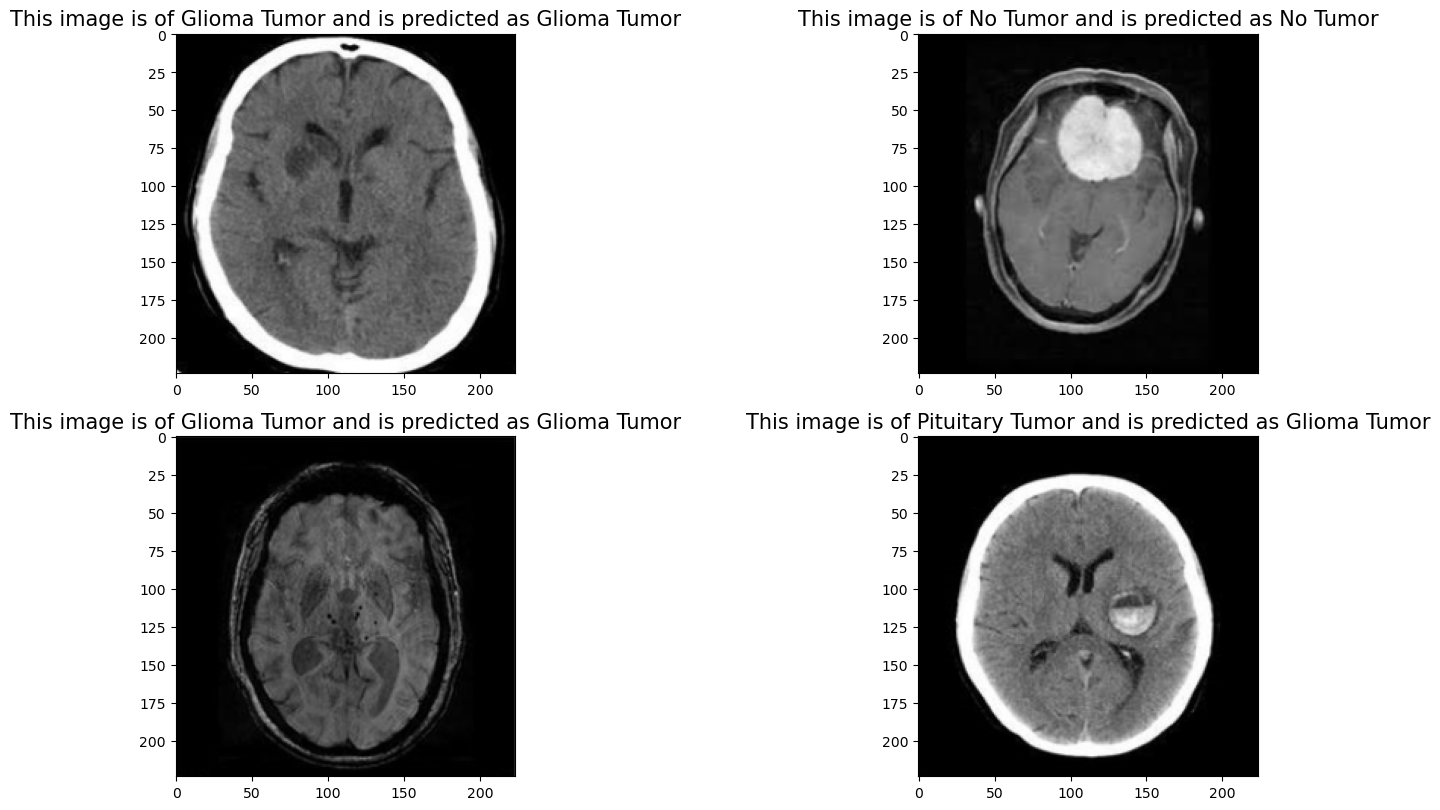

In [16]:
# Prediction using VGG16 model

plt.figure(figsize=(15,12))
for i in range(4):
    plt.subplot(3,2,(i%12)+1)
    index=np.random.randint(200)
    pred_class=inverse_classes(np.argmax(model2.predict(np.reshape(test_x[index],(-1,224,224,3))),axis=1))
    plt.title('This image is of {0} and is predicted as {1}'.format(inverse_classes(test_data.label[index]),pred_class),
              fontdict={'size':15})
    plt.imshow(test_x[index])
    plt.tight_layout()

In [17]:
model2.save('TransferLer.h5')